<a href="https://colab.research.google.com/github/sharif2124/Admob/blob/main/Machine%20Learning%20Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


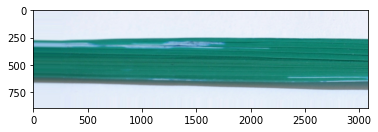

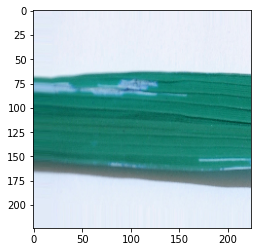

In [ ]:
import numpy as np #mathmatical calculation laibarey
import matplotlib.pyplot as plt #data viizulize,accruracy losss
import os #data serilaize,collect kora,join kora
import cv2 #picture vizulation or anylice,rezulation maintain,resize,black and whit colour kora jai
from tqdm import tqdm #time,data maintain code running timing calculation


DATADIR = '/content/drive/MyDrive/Paddy Detection/android train'

CATEGORIES = ["Bacterial Blight", "Brown Spot", "Healthy","Hispa","Leaf Blast","Leaf Smut"] #list

for category in CATEGORIES:  # do dogs and cats //showing picture rezulation
    path = os.path.join(DATADIR,category)  # create path to dogs and cats joining DATADIR,category path
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img))  # convert to array  picture showing properly from drive
        plt.imshow(img_array)  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!

IMG_SHAPE = (224,224)

new_array = cv2.resize(img_array,IMG_SHAPE )
plt.imshow(new_array)
plt.show()

In [ ]:
training_data = [] # data entry as a list 

def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 -5). indexing 0=bactrial blight

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:                                         #error handelnig
                img_array = cv2.imread(os.path.join(path,img))  # convert to array
                new_array = cv2.resize(img_array,IMG_SHAPE )  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

print(len(training_data))

100%|██████████| 48/48 [00:26<00:00,  1.81it/s]

288


In [ ]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img))  # convert to array
                new_array = cv2.resize(img_array,IMG_SHAPE )  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

print(len(training_data))

100%|██████████| 48/48 [00:17<00:00,  2.82it/s]

288


In [ ]:
import random #data ke randomly shafol ba ulotpalot korar jonno labairy use korchi

random.shuffle(training_data)

X_train = []
y_train = []

for features,label in training_data:
    X_train.append(features)
    y_train.append(label)

X_train = np.array(X_train).reshape(-1, 224, 224, 3)

from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, 6)

In [ ]:
import pickle #data save kore rakhar jonno 

pickle_out = open("X_train.pickle","wb")
pickle.dump(X_train, pickle_out)
pickle_out.close()

pickle_out = open("y_train.pickle","wb")
pickle.dump(y_train, pickle_out)
pickle_out.close()

In [ ]:
#save kora pickle file ta ke use korar jonno load kortechi

pickle_in = open("/content/X_train.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("/content/y_train.pickle","rb")
y = pickle.load(pickle_in)

X=np.array(X/255.0)

y=np.array(y)

X.shape
y.shape

(288, 6)

In [ ]:
import tensorflow as tf #deef learning er sob theke important laibary hocche tensorflow laibary

from tensorflow.keras.preprocessing.image import ImageDataGenerator #ImageDataGenerator function importing for photo resize ,zoom etc
from tensorflow.keras.models import Sequential, Model # model import Sequential is one kind of nural network
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten # layer import nural network er part Dens,dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D #layer import Conv2D, MaxPooling2D layer nural network er part
%load_ext tensorboard
from tensorflow.keras.callbacks import TensorBoard #accreacy viszulation graph akare,code start timeing
import datetime as dt
log_dir='log/' #for working tensorboard
!rm -rf log/ #log starting and ending rf means random forest fm means random marge

In [ ]:
dense = tf.keras.applications.mobilenet_v2.MobileNetV2(input_shape=(224,224,3), weights='imagenet', include_top=False) #MobileNetV2 model algorithom download

for layer in dense.layers: #prevent demolish  previous intelegence 
    layer.trainable = False

x = Flatten()(dense.output)
prediction = Dense(6, activation='softmax')(x) #customize the model with our dataset
model = Model(inputs=dense.input, outputs=prediction)

model.compile( #compiling our customize model
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

callbacks = [tf.keras.callbacks.TensorBoard(log_dir='log/{}'.format(dt.datetime.now().strftime("%Y-%m-%d-%H-%M-%S")))]

9412608/9406464 [==============================] - 0s 0us/step


In [ ]:
h=model.fit(
  X,y,
  batch_size=8, #data train korbe 8 ta kore ekbare
  epochs=20, #hole data ke total 20 bar train korano hoi
  callbacks=callbacks #tensorboard er kaj
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 1/20
36/36 [==============================] - 32s 43ms/step - loss: 6.7119 - accuracy: 0.5590
Epoch 2/20
36/36 [==============================] - 1s 26ms/step - loss: 1.1523 - accuracy: 0.9028
Epoch 3/20
36/36 [==============================] - 1s 26ms/step - loss: 0.3487 - accuracy: 0.9549
Epoch 4/20
36/36 [==============================] - 1s 26ms/step - loss: 0.1451 - accuracy: 0.9722
Epoch 5/20
36/36 [==============================] - 1s 26ms/step - loss: 2.4223e-05 - accuracy: 1.0000
Epoch 6/20
36/36 [==============================] - 1s 26ms/step - loss: 1.6817e-04 - accuracy: 1.0000
Epoch 7/20
36/36 [==============================] - 1s 26ms/step - loss: 1.4043e-05 - accuracy: 1.0000
Epoch 8/20
36/36 [==============================] - 1s 26ms/step - loss: 1.0669e-05 - accuracy: 1.0000
Epoch 9/20
36/36 [==============================] - 1s 26ms/step - loss: 8.6932e-06 - accuracy: 1.0000
Epoch 10/20
36/36 [==============================] - 1s 26ms/step - loss: 7.5714e-06 - a

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_float_model = converter.convert()

# মডেলের সাইজ কিলোবাইটে
float_model_size = len(tflite_float_model) / 1024
print('Float model size = %dKBs.' % float_model_size)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: /tmp/tmpbpl50jw6/assets
Float model size = 10121KBs.


In [ ]:
f = open('paddy_mobile2.tflite', "wb")
f.write(tflite_float_model)
f.close()

# ডাউনলোড করি mnist.tflite হিসেবে
from google.colab import files
files.download('paddy_mobile2.tflite')

print('`paddy_mobile2.tflite` has been downloaded')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

`paddy_mobile2.tflite` has been downloaded
